In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import word2vec
import jieba

In [2]:
df_train=pd.read_csv('train_first.csv')
df_predict=pd.read_csv('predict_first.csv')
df_sample=pd.read_csv('YNU.EDU2018-ScenicWord_submite_sample.csv', header=None)

In [3]:
df_train.head(1)

,Id,Discuss,Score
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的,5


In [4]:
df_predict.head(1)

,Id,Discuss
0,9a1caf96-681e-3c11-b588-43ac742d7fd2,快乐之旅


In [5]:
df_sample.head(1)

,0,1
0,9a1caf96-681e-3c11-b588-43ac742d7fd2,1


In [6]:
df_train_discuss=df_train.iloc[:,1]
df_train_score=df_train.iloc[:,2]
df_predict_disscuss=df_predict.iloc[:,1]

In [7]:
size_train=df_train_discuss.shape[0]
size_predict=df_predict_disscuss.shape[0]

In [15]:
#把所有评论写进data.txt
txtName = "data.txt"
f=open(txtName, "a+")
for i in range(size_train):
  new_context = df_train_discuss[i]
  f.write(new_context)
f.close()

f=open(txtName, "a+")
for i in range(size_predict):
  new_context = df_predict_disscuss[i]
  f.write(new_context)
f.close()

In [17]:
##把所有评论分词后写进data_cut.txt
import jieba

txtName = "data_cut.txt"
f=open(txtName, "a+")
for i in range(size_train):
  new_context = df_train_discuss[i]
  seg_list = jieba.cut(new_context, cut_all=False)  #精确模式
  temp=" ".join(seg_list)
  f.write(temp)
f.close()

f=open(txtName, "a+")
for i in range(size_predict):
  new_context = df_predict_disscuss[i]
  seg_list = jieba.cut(new_context, cut_all=False)  #精确模式
  temp=" ".join(seg_list)
  f.write(temp)
f.close()

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 2.379 seconds.
Prefix dict has been built succesfully.


In [18]:
#分词结果转词向量
word2vec.word2vec('data_cut.txt','datacut2vec.txt',size=100,binary=0,verbose=True)

Starting training using file data_cut.txt
Vocab size: 30794
Words in train file: 3512108
Alpha: 0.000002  Progress: 100.23%  Words/thread/sec: 194.97k  

In [19]:
#分词结果转词向量，binary=1，保存2进制
word2vec.word2vec('data_cut.txt','datacut2vec.bin',size=100,verbose=True)

Starting training using file data_cut.txt
Vocab size: 30794
Words in train file: 3512108
Alpha: 0.000002  Progress: 100.24%  Words/thread/sec: 191.01k  

In [8]:
#加载2进制模型
model = word2vec.load("datacut2vec.bin")

In [12]:
#查看(词种类,向量长度)
model.vectors.shape

(30794, 100)

In [13]:
#查看开心相似的词
indexes, metrics = model.cosine('开心')
model.generate_response(indexes, metrics).tolist()

[('愉快', 0.8231577460181105),
 ('尽兴', 0.808566055801806),
 ('高兴', 0.8044531686098497),
 ('满意', 0.7948009050165401),
 ('嗨', 0.7914376428645133),
 ('玩得', 0.7709018268364819),
 ('刺激', 0.7003743350078403),
 ('好玩', 0.6932283527654731),
 ('过瘾', 0.6805863446233239),
 ('不亦乐乎', 0.6628179337460192)]

In [14]:
model.vocab[indexes]

array(['愉快', '尽兴', '高兴', '满意', '嗨', '玩得', '刺激', '好玩', '过瘾', '不亦乐乎'],
      dtype='<U78')

In [15]:
model['开心']

array([-0.01928491,  0.0662433 ,  0.03182978,  0.01492733, -0.00763006,
        0.00848764,  0.0889774 ,  0.18722373, -0.0669461 ,  0.17440498,
       -0.03267164, -0.01789011, -0.11087401, -0.0636642 ,  0.35319501,
       -0.03246265,  0.00619818,  0.06895117,  0.07648829, -0.01684442,
        0.01501444,  0.01175302,  0.05242033,  0.02011202,  0.00458811,
       -0.0424597 , -0.09620111, -0.15486436,  0.04866413, -0.01261033,
       -0.01905541,  0.05134242, -0.08318099,  0.09625493,  0.08618046,
       -0.08016401,  0.04179135,  0.00924249, -0.06242755,  0.07495977,
        0.06964105, -0.01402107,  0.01183268,  0.00894212, -0.08718424,
        0.04243084,  0.01501214, -0.12650648, -0.13411283,  0.04910121,
       -0.02797421,  0.10500129, -0.19808939,  0.17301838, -0.03156738,
        0.04039668,  0.15247281, -0.13889749,  0.0563883 ,  0.11078001,
       -0.04900065, -0.0078511 , -0.20173605, -0.06440339,  0.0083207 ,
       -0.20345651, -0.20412733, -0.03150341, -0.00864833, -0.05

In [16]:
model.vectors

array([[ 0.14333282,  0.15825513, -0.13715845, ...,  0.05456942,
         0.10955409,  0.00693387],
       [ 0.12141711, -0.14077131,  0.20536812, ..., -0.10433207,
         0.0565908 , -0.22133273],
       [-0.09403267, -0.07335123,  0.1379277 , ..., -0.14185134,
         0.13306837, -0.09429559],
       ..., 
       [ 0.20820595, -0.20082836, -0.07143635, ...,  0.06747279,
        -0.02966592, -0.03366085],
       [ 0.02756922, -0.11525479, -0.00517522, ...,  0.1253989 ,
        -0.01663296, -0.0978307 ],
       [-0.01295421,  0.11005488, -0.11723243, ...,  0.06605586,
         0.08689452,  0.00726512]])

In [17]:
'开心' in model.vocab

True

In [39]:
model.vocab[:100]

array(['</s>', '，', '的', '。', '是', '了', '很', '去', '在', '有', '、', '也', '都',
       '就', '可以', '/', '好', '！', '<', 'br', '>', '我', '人', '和', '到', '不',
       '不错', '一个', '景区', '就是', '地方', '还', '还是', '看', '要', '没有', '上', '很多',
       '我们', '这里', '多', '值得', '非常', '景点', '时候', '走', '感觉', '“', 'rn', '”',
       '来', '但是', '比较', '风景', '里面', '着', '门票', '真的', '看到', '会', '还有', '大',
       '美', '你', '说', '没', '元', '景色', '吧', '不过', '但', '时间', '从', '~', '（',
       '个', '特别', '中', '最', '玩', '为', '等', '北京', '）', '所以', '能', '这', '坐',
       '看看', '喜欢', '建筑', '下', '西湖', '不是', '小', '因为', '再', '挺', '一定', '：'],
      dtype='<U78')

In [19]:
model['。']

array([ 0.09764452, -0.01303583,  0.15681861,  0.05190873, -0.01307653,
        0.00175333, -0.04392988, -0.09530123, -0.01999159, -0.08307609,
       -0.0053444 , -0.1087267 , -0.03606439,  0.16464292,  0.05315719,
        0.0408749 , -0.02366183, -0.16061747,  0.06861912, -0.13888219,
       -0.06347895,  0.03101562,  0.08214869,  0.03817331,  0.09868269,
       -0.11564768, -0.04638781,  0.17404495, -0.11705438,  0.08511067,
       -0.01265445,  0.00102463,  0.08052276, -0.00835348,  0.13221705,
       -0.04681504,  0.08059558,  0.12184568,  0.03985736,  0.05522351,
        0.10067814, -0.00441468,  0.06466655, -0.14183915,  0.16349228,
        0.02168658,  0.19480647, -0.19246206, -0.07416003,  0.0740526 ,
        0.06234412,  0.04168399, -0.05237995, -0.09793588, -0.16488567,
        0.05525423, -0.02878505,  0.19689924, -0.01365539, -0.06514952,
       -0.20056464, -0.03691774,  0.10557638,  0.17961128, -0.04169786,
       -0.01951198, -0.22390193, -0.05919082,  0.07955503,  0.07

In [21]:
df_train_discuss.head(5)

0                好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的
1                      新中国成立也是在这举行，对我们中国人来说有些重要及深刻的意义！
2                  庐山瀑布非常有名，也有非常多个瀑布，只是最好看的非三叠泉莫属，推荐一去
3    个人觉得颐和园是北京最值的一起的地方，不过相比下门票也是最贵的，比起故宫的雄伟与气势磅礴，颐...
4                                               迪斯尼一日游
Name: Discuss, dtype: object

In [9]:
#得到副本，进行统计字符长度
df_train_discuss_copy=copy.deepcopy(df_train_discuss)
for i in range(len(df_train_discuss_copy)):
    df_train_discuss_copy[i]=len(df_train_discuss_copy[i])

In [10]:
df_train_discuss_copy.head(2)

0    37
1    31
Name: Discuss, dtype: object

In [11]:
#df_train_discuss_copy.plot.bar()
df_train_discuss_copy.mean()

48.283499999999997

In [12]:
#作为不在model.vocab词向量表的填充
base=model['。']

In [ ]:
size_train = len(df_train_discuss)
data_array = np.array([]).reshape(-1, 4000)
for i in range(size_train):
    new_context = df_train_discuss[i]
    seg_list = jieba.cut(new_context, cut_all=False)  # 精确模式
    temp = "#".join(seg_list)
    vec = temp.split('#')
    temp_list = []
    for item in vec:
        if item in model.vocab:
            temp_list.append(model[item].tolist())
        else:
            temp_list.append(base.tolist())
    len2 = len(temp_list)
    if len2 > 40:
        temp_list = temp_list[:40]
    if len2 < 40:
        for i in range(40 - len2):
            temp_list.append(base.tolist())
    data_array = np.concatenate((data_array, np.array(temp_list).reshape(1, -1)), axis=0)


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.578 seconds.
Prefix dict has been built succesfully.


In [9]:
data_array.shape

(2, 10000)

In [29]:
##把所有评论分词后写进data_cut.txt
size_train=len(df_train_discuss)
data_array=base.reshape(1,-1)
for i in range(1):
  new_context = df_train_discuss[i]
  seg_list = jieba.cut(new_context, cut_all=False)  #精确模式
  temp="#".join(seg_list)
  vec=temp.split('#')
  print(vec)
  temp_list=[]
  for item in vec:
    if item in model.vocab:
      temp_list.append(model[item].tolist())
    else:
      temp_list.append(base.tolist())
  len2=len(temp_list)
  if len2>100:
    temp_list=temp_list[:100]
  if len2<100:
    for i in range(100-len2):
        temp_list.append(base.tolist())
  data_array=np.concatenate((data_array, np.array(temp_list)), axis=0)

['好大', '的', '一个', '游乐', '公园', '，', '已经', '去', '了', '2', '次', '，', '但', '感觉', '还', '没有', '玩够', '似的', '！', '会', '有', '第三', '，', '第四次', '的']


In [28]:
data_array.shape


(101, 100)

In [19]:
a = np.array([[1, 2,3], [3, 4,5]])
b = np.array([[5, 6,9]])
c=np.concatenate((a, b), axis=0)
c

array([[1, 2, 3],
       [3, 4, 5],
       [5, 6, 9]])

In [16]:
data_array=base.reshape(1,-1)
data_array.shape

(1, 100)

In [17]:
data_array

array([[ 0.09764452, -0.01303583,  0.15681861,  0.05190873, -0.01307653,
         0.00175333, -0.04392988, -0.09530123, -0.01999159, -0.08307609,
        -0.0053444 , -0.1087267 , -0.03606439,  0.16464292,  0.05315719,
         0.0408749 , -0.02366183, -0.16061747,  0.06861912, -0.13888219,
        -0.06347895,  0.03101562,  0.08214869,  0.03817331,  0.09868269,
        -0.11564768, -0.04638781,  0.17404495, -0.11705438,  0.08511067,
        -0.01265445,  0.00102463,  0.08052276, -0.00835348,  0.13221705,
        -0.04681504,  0.08059558,  0.12184568,  0.03985736,  0.05522351,
         0.10067814, -0.00441468,  0.06466655, -0.14183915,  0.16349228,
         0.02168658,  0.19480647, -0.19246206, -0.07416003,  0.0740526 ,
         0.06234412,  0.04168399, -0.05237995, -0.09793588, -0.16488567,
         0.05525423, -0.02878505,  0.19689924, -0.01365539, -0.06514952,
        -0.20056464, -0.03691774,  0.10557638,  0.17961128, -0.04169786,
        -0.01951198, -0.22390193, -0.05919082,  0.0

In [27]:
d=base.reshape(1,-1)

In [31]:
e=np.concatenate((d, d), axis=0)

In [32]:
e

array([[ 0.09764452, -0.01303583,  0.15681861,  0.05190873, -0.01307653,
         0.00175333, -0.04392988, -0.09530123, -0.01999159, -0.08307609,
        -0.0053444 , -0.1087267 , -0.03606439,  0.16464292,  0.05315719,
         0.0408749 , -0.02366183, -0.16061747,  0.06861912, -0.13888219,
        -0.06347895,  0.03101562,  0.08214869,  0.03817331,  0.09868269,
        -0.11564768, -0.04638781,  0.17404495, -0.11705438,  0.08511067,
        -0.01265445,  0.00102463,  0.08052276, -0.00835348,  0.13221705,
        -0.04681504,  0.08059558,  0.12184568,  0.03985736,  0.05522351,
         0.10067814, -0.00441468,  0.06466655, -0.14183915,  0.16349228,
         0.02168658,  0.19480647, -0.19246206, -0.07416003,  0.0740526 ,
         0.06234412,  0.04168399, -0.05237995, -0.09793588, -0.16488567,
         0.05525423, -0.02878505,  0.19689924, -0.01365539, -0.06514952,
        -0.20056464, -0.03691774,  0.10557638,  0.17961128, -0.04169786,
        -0.01951198, -0.22390193, -0.05919082,  0.0

In [30]:
vec=temp.split('#')

In [51]:
test1=np.zeros([100,100])

In [50]:
base=model['。']

In [54]:
for i in range(100):
    test1[i]=base

In [64]:
base

array([ 0.09764452, -0.01303583,  0.15681861,  0.05190873, -0.01307653,
        0.00175333, -0.04392988, -0.09530123, -0.01999159, -0.08307609,
       -0.0053444 , -0.1087267 , -0.03606439,  0.16464292,  0.05315719,
        0.0408749 , -0.02366183, -0.16061747,  0.06861912, -0.13888219,
       -0.06347895,  0.03101562,  0.08214869,  0.03817331,  0.09868269,
       -0.11564768, -0.04638781,  0.17404495, -0.11705438,  0.08511067,
       -0.01265445,  0.00102463,  0.08052276, -0.00835348,  0.13221705,
       -0.04681504,  0.08059558,  0.12184568,  0.03985736,  0.05522351,
        0.10067814, -0.00441468,  0.06466655, -0.14183915,  0.16349228,
        0.02168658,  0.19480647, -0.19246206, -0.07416003,  0.0740526 ,
        0.06234412,  0.04168399, -0.05237995, -0.09793588, -0.16488567,
        0.05525423, -0.02878505,  0.19689924, -0.01365539, -0.06514952,
       -0.20056464, -0.03691774,  0.10557638,  0.17961128, -0.04169786,
       -0.01951198, -0.22390193, -0.05919082,  0.07955503,  0.07

In [65]:
temp_list=[]
count=0
for item in vec:
   if item in model.vocab:
     temp_list.append(model[item])
   else:
     temp_list.append(base)

   
    
    

In [74]:
len(temp_list)

100

In [75]:
array_temp=np.array(temp_list)

In [77]:
array_temp

array([[-0.01961502,  0.01825931, -0.03837677, ...,  0.0343005 ,
         0.14417726, -0.19436581],
       [-0.09403267, -0.07335123,  0.1379277 , ..., -0.14185134,
         0.13306837, -0.09429559],
       [-0.13044085, -0.12964328, -0.05280824, ..., -0.03047117,
         0.23185164,  0.03601008],
       ..., 
       [ 0.09764452, -0.01303583,  0.15681861, ..., -0.06615977,
        -0.0129356 , -0.22671501],
       [ 0.09764452, -0.01303583,  0.15681861, ..., -0.06615977,
        -0.0129356 , -0.22671501],
       [ 0.09764452, -0.01303583,  0.15681861, ..., -0.06615977,
        -0.0129356 , -0.22671501]])

In [70]:
t2=[1,2,3,4,5]

In [71]:
t2=t2[:2]

In [72]:
t2

[1, 2]

In [37]:
test1

'开心' in model.vocab


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

好大
的
一个
游乐
公园
，
已经
去
了
2
次
，
但
感觉
还
没有
玩够
似的
！
会
有
第三
，
第四次
的


In [31]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])


In [32]:
df

,a,b,c,d
0,0.391109,0.111701,0.352457,0.195200
1,0.306337,0.602399,0.315100,0.209010
2,0.925168,0.754941,0.114630,0.241707
3,0.333617,0.171248,0.498209,0.917062
4,0.313220,0.493201,0.522406,0.750932
5,0.452456,0.938258,0.543880,0.624329
6,0.896390,0.335073,0.200316,0.838435
7,0.498633,0.253226,0.149904,0.005616
8,0.060299,0.300905,0.901366,0.117723
9,0.796795,0.638461,0.237992,0.975760


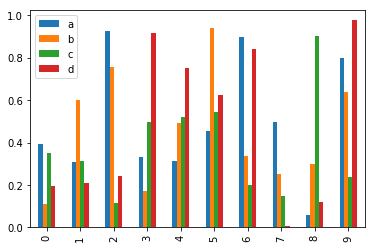

In [33]:
df.plot.bar()

In [43]:
import sys
sys.path.append('..')

import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torchvision.datasets import CIFAR10

In [47]:
def vgg_block(num_convs, in_channels, out_channels):
    net = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), nn.ReLU(True)] # 定义第一层
    
    for i in range(num_convs-1): # 定义后面的很多层
        net.append(nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1))
        net.append(nn.ReLU(True))
        
    net.append(nn.MaxPool2d(2, 2)) # 定义池化层
    return nn.Sequential(*net)

In [55]:
"""
第一个是模型层数，第二个是输入的通道数，第三个是输出的通道数，第一层卷积接受的输入通道就是图片
输入的通道数，然后输出最后的输出通道数，后面的卷积接受的通道数就是最后的输出通道数
"""
block_demo = vgg_block(16, 1, 5)
print(block_demo)

Sequential (
  (0): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU (inplace)
  (2): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU (inplace)
  (4): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU (inplace)
  (6): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU (inplace)
  (8): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU (inplace)
  (10): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU (inplace)
  (12): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU (inplace)
  (14): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU (inplace)
  (16): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU (inplace)
  (18): Conv2d(5, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (19): ReLU (inplace)
  (20): Conv2d(5, 5, kernel_size=(3, 3), stride

In [56]:
block_demo = vgg_block(3, 64, 128)
print(block_demo)

Sequential (
  (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU (inplace)
  (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU (inplace)
  (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU (inplace)
  (6): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
)


In [57]:
# 首先定义输入为 (1, 64, 300, 300)
input_demo = Variable(torch.zeros(1, 64, 300, 300))
output_demo = block_demo(input_demo)


AttributeError: 'Variable' object has no attribute 'shape'

In [61]:
print(output_demo.data.shape)

torch.Size([1, 128, 150, 150])


In [62]:
def vgg_stack(num_convs, channels):
    net = []
    for n, c in zip(num_convs, channels):
        in_c = c[0]
        out_c = c[1]
        net.append(vgg_block(n, in_c, out_c))
    return nn.Sequential(*net)

In [63]:
vgg_net = vgg_stack((1, 1, 2, 2, 2), ((3, 64), (64, 128), (128, 256), (256, 512), (512, 512)))
print(vgg_net)

Sequential (
  (0): Sequential (
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (1): Sequential (
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (2): Sequential (
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU (inplace)
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (3): Sequential (
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU (inplace)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU (inplace)
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (4): Sequential (
    (0): 

In [64]:
test_x = Variable(torch.zeros(1, 3, 256, 256))
test_y = vgg_net(test_x)
print(test_y.data.shape)

torch.Size([1, 512, 8, 8])


In [65]:
class vgg(nn.Module):
    def __init__(self):
        super(vgg, self).__init__()
        self.feature = vgg_net
        self.fc = nn.Sequential(
            nn.Linear(512, 100),
            nn.ReLU(True),
            nn.Linear(100, 10)
        )
    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x